![logo](https://user-images.githubusercontent.com/59526258/124226124-27125b80-db3b-11eb-8ba1-488d88018ebb.png)

> **Copyright (c) 2021 CertifAI Sdn. Bhd.**<br>
 <br>
This program is part of OSRFramework. You can redistribute it and/or modify
<br>it under the terms of the GNU Affero General Public License as published by
<br>the Free Software Foundation, either version 3 of the License, or
<br>(at your option) any later version.
<br>
<br>This program is distributed in the hope that it will be useful,
<br>but WITHOUT ANY WARRANTY; without even the implied warranty of
<br>MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
<br>GNU Affero General Public License for more details.
<br>
<br>You should have received a copy of the GNU Affero General Public License
<br>along with this program.  If not, see <http://www.gnu.org/licenses/>.
<br>

# Student's t-Test for Hypothesis Testing

This is the known to be the simplest statistical test and a commonly used technique to compare the means of two given samples.

_When to use a t-test?_

Let's say you have two groups of students in a class, one group consists of those who attend a regular mentoring session while the other did not. You measure the marks that they got in an exam and you wish to find out whether the scores of those who attended the additional lessons is significantly higher than those who did not. For these kinds of cases, you can use the t-test! Note: there are different types of t-tests you might need to consider depending on how the group of students were chosen as well as how the mean marks measurements were made.

In this notebook, we will look at using the test for the following cases:

* 1 sample t-test
* 2-sample t-test
* Paired t-test

Assumptions made by t-test about your data:
1. Data are independent
2. Distribution is approximately normal
3. Data have similar amount of variance within each group that is being compared

_Fun-fact:  the test was actually developed by statistician William Gosset. He was an avid researcher with a curious mind and he developed a lot of different techniques. However, due to the company policy that he was working at, he had to sign his research papers under the pen name **Student**._

This notebook contains exercises and sample solutions for problems found in 

_Hypothesis Testing: An Intuitive Guide for Making Data Driven Decisions_ (Frost, 2020)

## One-Tailed or Two-Tailed

Before we go further to talk about the different types of t-tests, let's talk about tails! In general, statistical tests can be one-tailed or two-tailed and this depends on what we are interested in investigating i.e., how our H<sub>1</sub> is written.

### One-Tailed Tests

This is suitable for when you're interested in finding difference between groups in a specific direction.

* H<sub>0</sub> : μ<sub>1</sub> = μ<sub>2</sub> AND H<sub>1</sub> : μ<sub>1</sub> > μ<sub>2</sub>
* H<sub>0</sub> : μ<sub>1</sub> = μ<sub>2</sub> AND H<sub>1</sub> : μ<sub>1</sub> < μ<sub>2</sub>

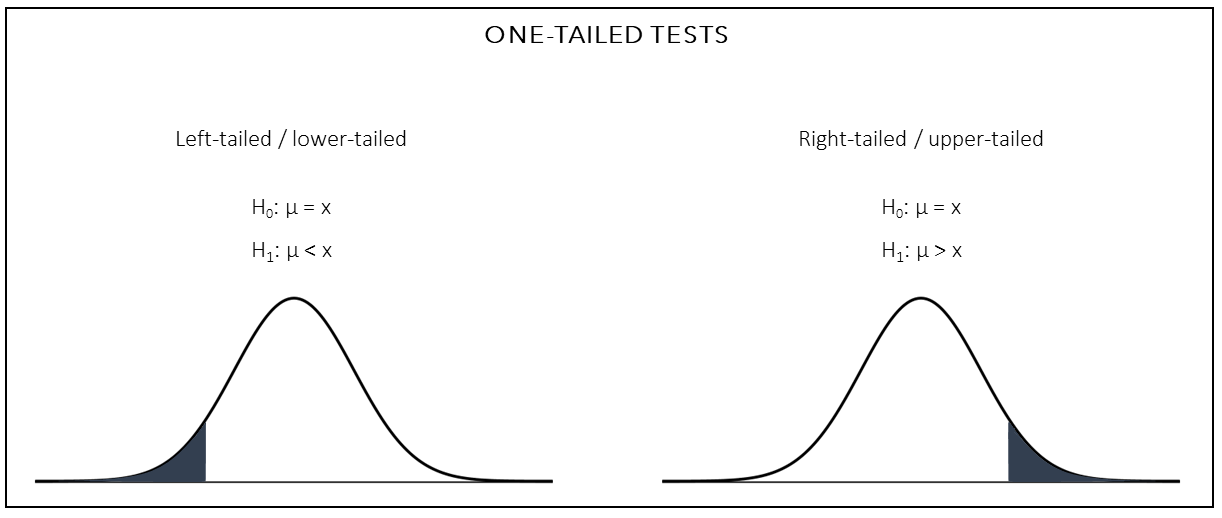

### Two-Tailed Tests

This is the more common out of the two, suitable for when direction is not specified.

* H<sub>0</sub> : μ<sub>1</sub> = μ<sub>2</sub> AND H<sub>1</sub> : μ<sub>1</sub> ≠ μ<sub>2</sub>

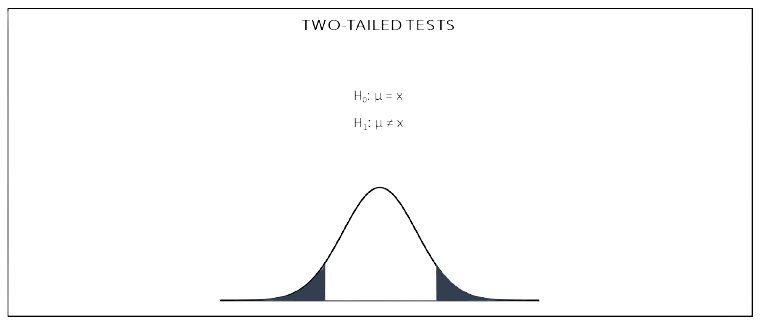

In [1]:
# import all required libraries

import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## One-Sample t-Test

We use this type of the test if we are comparing a group against a standard value i.e. comparing the group average with a set average (population mean)

Example: a researcher wishes to see whether the time to walk 5km is longer than the average 45 minutes.

### Problem #1:

Using the AssessmentScores data file, we are going to test whether participants who attended an educational session have mastered a skill more than that of the usual target value. We will investigate if the mean scores of 15 randomly selected participants is higher than 60.

In [2]:
# load our data into a data frame
df_one = pd.read_csv('../resources/AssessmentScores.csv')
df_one.head()

,Score
0,69.118225
1,73.705033
2,83.539635
3,53.115325
4,61.805602


In [3]:
df_one.Score.count()

15

<AxesSubplot:xlabel='Score', ylabel='Density'>

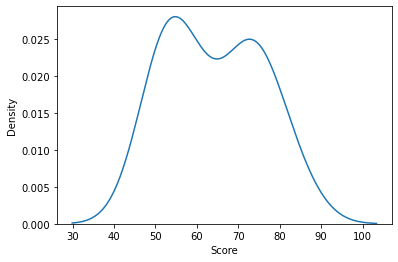

In [4]:
# Plot the sample distribution

sb.kdeplot(df_one.Score)

In [5]:
# Calculate the mean and s.d. statistics from our sample data

print('Sample mean: {}'.format(df_one.Score.mean()))
print('Standard deviation: {}'.format(df_one.Score.std()))

Sample mean: 64.15818651056485
Standard deviation: 11.354133473402653


From here, we can see that the mean score is 64.16. We will see whether this is significantly high enough to determine an improvement.

H<sub>0</sub>: μ = 60

H<sub>1</sub>: μ > 60

For our test, we will use a significance level of 5% i.e. a confidence interval of 95%

In [6]:
# Calculating t statistic and p-value

stats.ttest_1samp(a=df_one.Score, popmean=60)

Ttest_1sampResult(statistic=1.41838979994091, pvalue=0.17795265748623812)

The test statistic **t** = 1.418 tells us how much the sample mean deviates from the null hypothesis. 

In [7]:
# Calculating critical value

stats.t.ppf(0.95, df=14)

1.7613101357748562

In [8]:
# Calculating confidence interval around our sample mean

sigma = df_one.Score.std()/math.sqrt(15)

stats.t.interval(0.95, df=14, loc=df_one.Score.mean(), scale=sigma)

(57.870476972533226, 70.44589604859647)

**Results:**

* Our p-value = 0.178 > α = 0.05
* Our test statistic t = 1.418 is less than the critical value = 1.761, and so the sample mean does not fall in the rejection region.
* From the confidence interval that we've calculated, the population mean of 60 is well captured within the interval.

**Conclusion:** 
We _fail to reject the null hypothesis_ as the p-value is greater than our significance level of 0.05. Our sample data provides no evidence that the mean is different than 60 and so we are unable to conclude whether the educational session was effective.

_Note: this could've been due to our sample data only derived from a low number of observations (15) which might not reflect that of the population. Generally, if you have more than 20 or at least 30 observations_

## (Independent) Two-Sample t-Test

We use this type of the test if we are comparing means from two different groups. 

Example: you wish to compare the average height between the male and female employees in a company. Note: the number of samples should be equal for comparison.

For two-sample tests, there are additional assumptions made:
* Sample data should be normally distributed → make sure the number of observations are large enough
* The groups being tested are independent → measurements taken on two distinct groups
* Groups may have equal or unequal variances → if your data does not assume equal variance you need to use Welch's t-test

### Problem #2

You are comparing the mean strength of products from two different groups. You want to determine whether the two means are different. For this question, we'll be using the file _StrengthMeansDifference.csv_

H<sub>0</sub>: μ<sub>x̄<sub>1</sub></sub> = μ<sub>x̄<sub>2</sub></sub> 

H<sub>1</sub>: μ<sub>x̄<sub>1</sub></sub> ≠ μ<sub>x̄<sub>2</sub></sub>

We will choose α = 0.05

In [9]:
# load our data into a dataframe
df_two = pd.read_csv('../resources/StrengthMeansDifference.csv')
df_two.head()

,Strength A,Strength B
0,16.131100,16.340774
1,32.084731,22.147800
2,23.022906,21.274852
3,19.759955,24.303171
4,18.608737,22.147900


In [10]:
df_two.describe()

,Strength A,Strength B
count,20.000000,20.000000
mean,20.690925,22.838844
std,3.411998,3.082077
min,16.131100,16.340774
25%,18.589845,21.065419
50%,20.721267,23.104311
75%,21.704559,24.990411
max,32.084731,27.896054


In [11]:
# Calculating t statistic and p-value

stats.ttest_ind(a=df_two['Strength A'], b=df_two['Strength B'], equal_var=True)

Ttest_indResult(statistic=-2.0891568131409435, pvalue=0.04344263592041847)

From this test, we get a p-value of 0.0434 which means that there is a 4.34% chance that we'd see a sample data this far apart if the two groups are actually the same. 

In [12]:
# Calculating critical value

stats.t.ppf(0.025, df=38) # degrees of freedom for independent sample → df = (N1-1)+(N2-1)

-2.0243941645751367

**Results:**

* Our p-value = 0.04344 < α = 0.05
* Our test statistic t = -2.089 is less than the critical value = -2.024, and so it falls in the rejection region.

**Conclusion:** 
We _reject the null hypothesis_ as the p-value is smaller than our significance level of 0.05. Our sample data provides evidence that the two sample means different from one another.

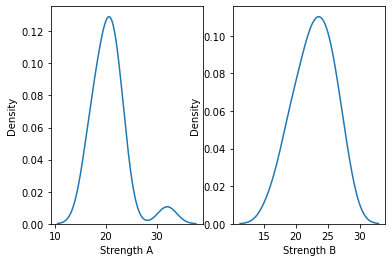

In [13]:
plt.subplot(1, 2, 1)
sb.kdeplot(df_two['Strength A'])
plt.xlabel('Strength A')

plt.subplot(1, 2, 2)
sb.kdeplot(df_two['Strength B'])
plt.xlabel('Strength B')

plt.show()

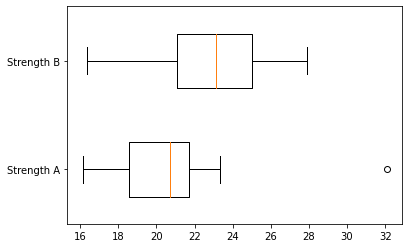

In [14]:
plt.boxplot(df_two, widths=0.5, vert=False)
plt.yticks([1,2], ['Strength A', 'Strength B'])
plt.show()

**Extra**

For the previous example, we used the two-sample t-test that assumes that both of our sample data has equal variance, but actually they don't. We can roughly see this visually through the boxplot that they have different variances so a more reliable test would be to use Welch t-test but we won't be covering this in this session!

## Paired t-Test

We use this type of the test if the measurement of two different groups come from a single population i.e. we compare separate means for a group measured at two different times or conditions.

Example: testing the effects before and after consuming a vitamin supplement.

AKA correlated pairs t-test, dependent samples t-test

### Problem 3.1

A training program was conducted to help improve participants' scores in a test. Data were collected from a random sample of 15 participants both before and after they attended the training program. We wish to investigate whether the training is effective in improving their scores at a significance level of 1%.

H<sub>0</sub>: μ<sub>1</sub> = μ<sub>2</sub>

H<sub>1</sub>: μ<sub>1</sub> ≠ μ<sub>2</sub>

In [15]:
# load our data into a dataframe
df_paired = pd.read_csv('../resources/StudyIntervention.csv')
df_paired.head()

,Before,After,Difference
0,-1.432329,1.003690,-2.436019
1,-1.439525,1.625069,-3.064593
2,-0.878131,-0.079252,-0.798879
3,2.046179,0.479616,1.566563
4,-0.062343,1.205168,-1.267511


Note: we will ignore the "Difference" column for now 

In [16]:
# calculate the mean scores of the participants before and after training

print('Sample mean (Before): {}'.format(df_paired.Before.mean()))
print('Sample mean (After): {}'.format(df_paired.After.mean()))
print('Sample size: {}'.format(df_paired.Before.count()+ df_paired.After.count()))

Sample mean (Before): 0.00252630688654496
Sample mean (After): 0.9975934923498115
Sample size: 30


In [17]:
# calculating t-statistic and p-value

stats.ttest_rel(a=df_paired.Before, b=df_paired.After)

Ttest_relResult(statistic=-2.4467838103850887, pvalue=0.02821786674483081)

In [18]:
# calculating critical value at lower tail

stats.t.ppf(0.005, df=14)

-2.9768427341126604

In [19]:
# calculating critical value at upper tail

stats.t.ppf(0.995, df=14)

2.97684273411266

In [20]:
df_paired.describe()

,Before,After,Difference
count,15.000000,15.000000,15.000000
mean,0.002526,0.997593,-0.995067
std,1.275712,0.778789,1.575079
min,-1.945189,-0.221376,-3.671487
25%,-1.155230,0.396431,-1.928862
50%,0.157812,1.205168,-1.094411
75%,0.721335,1.518646,-0.036467
max,2.046179,2.555018,1.729740


**Results:**

* Our p-value = 0.0282 > α = 0.01
* Our test statistic t = -2.447 is greater than the critical value = -2.756, and so it does not fall in the rejection region.

**Conclusion:** 
We _fail to reject the null hypothesis_ as the p-value is greater than our significance level of 0.01. Our sample data provides no evidence that the means scores are different and so we are unable to conclude that the training is effective.


**HOWEVER**, this might be a case of false positive i.e. we're being too strict on our α value. If we had chosen α = 0.05, we would be able to reject the null hypothesis.

### Problem 3.2

For the previous problem, actually we can also do the hypothesis test using a one-sample t-test approach! Paired t-tests and one-sample t tests are practically the same thing. Here, what we'll do is take the difference of paired observations (e.g. before and after) and then conduct a one-sample t-test on the differences. We are interested in determining whether the paired differences are different than 0. If we were to rewrite our hypothesis:

H<sub>0</sub>: μ<sub>d</sub> = 0

H<sub>1</sub>: μ<sub>d</sub> ≠ 0

μ<sub>d</sub> : mean difference

In [21]:
# calculate mean difference

print('Sample mean (Difference): {}'.format(df_paired.Difference.mean()))

Sample mean (Difference): -0.9950671854632667


In [22]:
# calculating t-statistic and p-value

stats.ttest_1samp(a=df_paired.Difference, popmean=0)

Ttest_1sampResult(statistic=-2.4467838103850883, pvalue=0.028217866744830834)

Notice that our statistical results are exactly the same as the previous one! 

In [23]:
# Calculating 95% confidence interval

sigma = df_paired.Difference.std()/math.sqrt(15)

stats.t.interval(0.95, df=14, loc=df_paired.Difference.mean(), scale=sigma)

(-1.8673170523727118, -0.12281731855382161)

Remember, if we had chosen α= 0.05, we conclude that the sample data provides evidence against the null hypothesis and so we reject it. The negative t-statistic indicates that the the mean score before is lower than the mean score after (i.e. before - after < 0).

But, this does not mean that the sample mean difference (-0.9951) is equal to the population difference. The confidence interval tells us that the actual population difference between the scores before and after is likely to be between -1.8673 and -0.1228 at a 95% interval.

# Exercise

## Question 1

A researcher is analysing families' fuel expenditure amd wants to determine whether the fuel cost this year had changed from last year's $260 per month. In this study, he collected a random sample of monthly costs from 25 families. Construct a hypothesis test with confidence interval of 95%

In [24]:
# read the CSV file: FuelCosts.csv located in your resources folder

In [25]:
# display the first 6 row of data

In [26]:
# produce some descriptive statistics from this sample data

In [27]:
# draw a kernel density plot to visualize the distribution

In [28]:
# calculate the mean cost

In [29]:
# perform  hypothesis testing and draw a conclusion

## Question 2

Suppose we have a class of students who uses two different learning methods. We want to compare the scores from the two teaching methods. We draw two random sample of students where one group uses Method A and the other uses Method B. Additionally, we also look at the students' performance in pre- and post-tests regardless of teaching methods.We want to see if the two mean scores of the methods are different. Assume data has equal variance

In [30]:
# read the CSV file method-comparison.csv located in your resources folder

In [31]:
# produce some descriptive statistics from this sample data

In [32]:
# identify the hypothesis

In [33]:
# perform hypothesis testing with α = 0.01 and draw a conclusion